# Uniform Manifold Approximation and Projection (UMAP)

In [1]:
# ! pip install umap-learn

In [2]:
# ## plotting functionality
# ! pip install umap-learn[plot] 

In [3]:
# import sklearn.datasets
import pandas as pd
import numpy as np

import umap
import umap.plot

In [4]:
'''
    2 classes: IAV (Index 0 to 40) & Human (Index 41 to 15684)
    
    Comparison of best and worst hyper-param in each method
    SDNE: Best a0_b10, Worst a0.2_b0, a0_b30
'''

'\n    2 classes: IAV (Index 0 to 40) & Human (Index 41 to 15684)\n    \n    Comparison of best and worst hyper-param in each method\n    SDNE: Best a0_b10, Worst a0.2_b0, a0_b30\n'

In [5]:
protein_list = pd.read_csv('protein_class.csv') 
protein_list

,Unnamed: 0,Protein1_ID,class
0,0,P03428,IAV
1,1,P03431,IAV
2,2,P03433,IAV
3,3,P03452,IAV
4,4,P03466,IAV
...,...,...,...
15680,15680,Q6NUS8,Human
15681,15681,P12018,Human
15682,15682,Q96IU2,Human
15683,15683,Q6PEW1,Human


In [6]:
target = protein_list['class'].values
target

array(['IAV', 'IAV', 'IAV', ..., 'Human', 'Human', 'Human'], dtype=object)

In [7]:
emb_name = 'node2vec_nw8_wl32'

In [8]:
edit_data_path = 'Embeddings/Graph/' + emb_name + '/' 

## Read Embeddings

In [9]:
hyper_param = 'p0.25_q0.5'

In [10]:
# emb = pd.read_csv(edit_data_path + hyper_param + '.txt', sep=' ', skiprows=1, header = None)
emb = pd.read_csv(edit_data_path + hyper_param + '.csv', skiprows=1, header = None)
emb_f = emb.sort_values(by=[0]).set_index([0])
emb_f

,1,2,3,4,5,6,7,8,9,10,...,119,120,121,122,123,124,125,126,127,128
0,,,,,,,,,,,,,,,,,,,,,
0,0.265851,0.274016,-0.307007,-0.045256,0.113147,-0.028997,0.086688,-0.216848,0.267893,-0.008590,...,-0.229462,-0.003405,-0.113239,0.143918,-0.250742,0.126979,0.035245,-0.026176,0.020964,-0.063250
1,0.277212,0.282548,-0.322317,-0.044387,0.116578,-0.034245,0.088413,-0.224330,0.287545,-0.005798,...,-0.240895,-0.000593,-0.112884,0.147059,-0.256624,0.131807,0.034069,-0.028362,0.022755,-0.062501
2,0.272241,0.286828,-0.315447,-0.049692,0.111304,-0.036518,0.086648,-0.226393,0.282227,-0.007501,...,-0.239123,-0.002849,-0.114505,0.153238,-0.256272,0.128491,0.032389,-0.025343,0.022003,-0.064888
3,0.219665,0.223164,-0.252147,-0.037488,0.093499,-0.023190,0.065952,-0.181205,0.223282,-0.008788,...,-0.190551,-0.003369,-0.089308,0.118178,-0.208461,0.102423,0.024060,-0.018594,0.021952,-0.048428
4,0.237608,0.248265,-0.279011,-0.038360,0.099428,-0.028556,0.077898,-0.197825,0.249147,-0.006765,...,-0.202223,-0.004622,-0.099024,0.131772,-0.227326,0.113400,0.028320,-0.023361,0.020116,-0.056897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15680,-0.004836,-0.002255,-0.002028,0.002040,0.000063,0.000031,0.002575,0.002012,-0.003457,-0.001088,...,-0.001298,0.002694,0.001047,0.003167,-0.002080,-0.002669,0.002038,-0.002390,-0.002840,-0.001001
15681,0.000993,-0.003977,-0.001900,0.001107,-0.000649,0.001063,0.001750,-0.002382,-0.002769,-0.003672,...,0.000513,-0.002096,0.002861,0.000308,0.000695,-0.001471,-0.000900,-0.003322,0.000418,-0.000267
15682,-0.005407,-0.003802,0.001227,-0.000304,0.000709,-0.003550,0.001792,-0.000370,-0.002602,-0.002883,...,0.004961,-0.002473,-0.002252,0.000336,0.004056,0.002577,-0.003558,0.000938,-0.003056,0.000528


In [11]:
g_features = emb_f.sort_index().values
print(g_features.shape)

(15685, 128)


In [12]:
g_features

array([[ 0.26585129,  0.27401555, -0.30700672, ..., -0.0261758 ,
         0.0209638 , -0.06324968],
       [ 0.27721158,  0.28254846, -0.32231733, ..., -0.02836169,
         0.02275474, -0.06250086],
       [ 0.27224052,  0.28682831, -0.31544703, ..., -0.02534319,
         0.02200343, -0.0648884 ],
       ...,
       [-0.0054074 , -0.00380242,  0.00122723, ...,  0.00093797,
        -0.00305608,  0.00052804],
       [ 0.00170958, -0.00123067,  0.00208227, ...,  0.00163221,
        -0.00348404, -0.0005972 ],
       [-0.00226417, -0.00357233, -0.00081281, ...,  0.00141987,
         0.0017645 ,  0.00215959]])

In [13]:
## Plot
mapper = umap.UMAP().fit(g_features)

<AxesSubplot:>

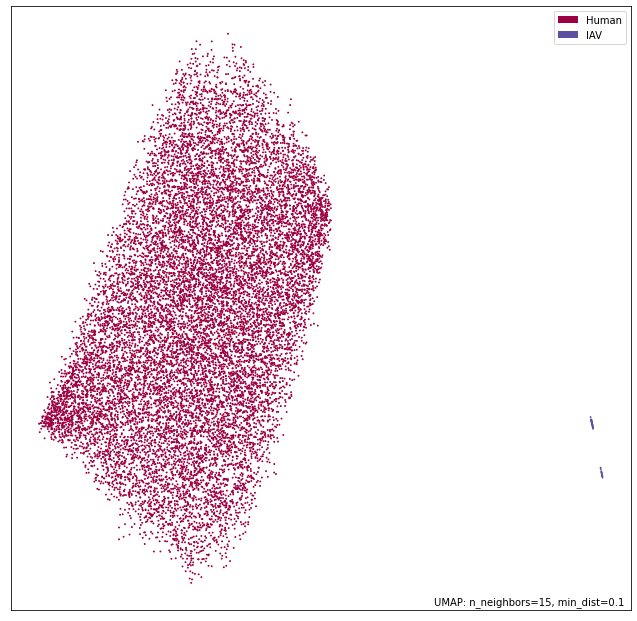

In [14]:
umap.plot.points(mapper, labels=target)

# Reference codes

In [15]:
# len(pendigits.feature_names) ## dimensions

In [16]:
# pendigits.data.shape

In [17]:
# len(pendigits.target)

In [18]:
# pendigits = sklearn.datasets.load_digits()
# pendigits

In [19]:
# mapper = umap.UMAP().fit(pendigits.data)

In [20]:
# umap.plot.points(mapper)

In [21]:
# umap.plot.points(mapper, labels=pendigits.target)